In [1]:
import tensorflow as tf
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import fit_plot, get_PU_labels


from multilayer_perceptron import MultilayerPerceptron
from pu_learning import ClassDepLossMultilayerPerceptron

In [2]:
# Network Parameters
n_input = 2
n_classes = 2

In [3]:
X, y = datasets.make_circles(n_samples=800, noise=0.2, factor=.3, random_state=0)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.5, random_state=42)
Y_train = np.eye(n_classes)[y_train]
print(X_train.shape)
print(Y_train.shape)

(400, 2)
(400, 2)


# Multilayer Perceptron without PU

('Epoch:', '0001', 'cost=', '0.739522964')
('Epoch:', '0011', 'cost=', '0.693839312')
('Epoch:', '0021', 'cost=', '0.657000870')
('Epoch:', '0031', 'cost=', '0.620838165')
('Epoch:', '0041', 'cost=', '0.583221808')
('Epoch:', '0051', 'cost=', '0.553376451')
('Epoch:', '0061', 'cost=', '0.543291926')
('Epoch:', '0071', 'cost=', '0.537951261')
('Epoch:', '0081', 'cost=', '0.534582496')
('Epoch:', '0091', 'cost=', '0.532145917')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

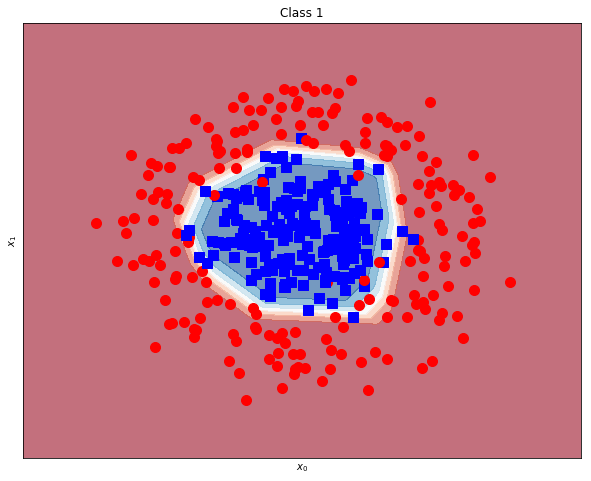

In [4]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          regularization=0,
                          training_epochs=100,
                          verbose=True)
fit_plot(X_train, Y_train, mp)

# PU setup

In [5]:
Y_train_pu = get_PU_labels(Y_train, random_seed=42)

('Using class_weight', array([ 1.        ,  3.23157895]))
('Epoch:', '0001', 'cost=', '0.815702960')
('Epoch:', '0011', 'cost=', '0.800546348')
('Epoch:', '0021', 'cost=', '0.793465704')
('Epoch:', '0031', 'cost=', '0.779414132')
('Epoch:', '0041', 'cost=', '0.767155647')
('Epoch:', '0051', 'cost=', '0.748087540')
('Epoch:', '0061', 'cost=', '0.735698298')
('Epoch:', '0071', 'cost=', '0.731583729')
('Epoch:', '0081', 'cost=', '0.730050802')
('Epoch:', '0091', 'cost=', '0.728412554')
('Using class_weight', array([  1.        ,  10.44310249]))


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

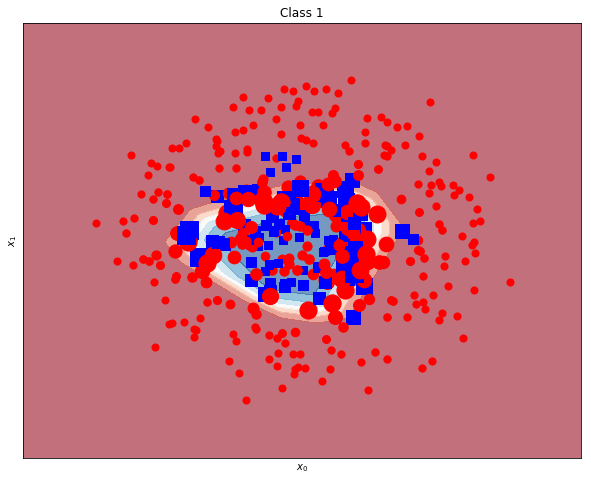

In [6]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          regularization=0,
                          training_epochs=100,
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), mp, "gradient")

('Using class_weight', array([ 1.        ,  6.46315789]))
('Epoch:', '0001', 'cost=', '1.025482714')
('Epoch:', '0011', 'cost=', '1.008085743')
('Epoch:', '0021', 'cost=', '0.988541439')
('Epoch:', '0031', 'cost=', '0.965998188')
('Epoch:', '0041', 'cost=', '0.948771030')
('Epoch:', '0051', 'cost=', '0.935564935')
('Epoch:', '0061', 'cost=', '0.913048074')
('Epoch:', '0071', 'cost=', '0.892016023')
('Epoch:', '0081', 'cost=', '0.882174000')
('Epoch:', '0091', 'cost=', '0.876528621')
('Epoch:', '0101', 'cost=', '0.872537479')
('Epoch:', '0111', 'cost=', '0.869605228')
('Epoch:', '0121', 'cost=', '0.867525145')
('Epoch:', '0131', 'cost=', '0.865815088')
('Epoch:', '0141', 'cost=', '0.864490762')
('Epoch:', '0151', 'cost=', '0.863467842')
('Epoch:', '0161', 'cost=', '0.862221792')
('Epoch:', '0171', 'cost=', '0.861338347')
('Epoch:', '0181', 'cost=', '0.861395136')
('Epoch:', '0191', 'cost=', '0.860922843')
('Using class_weight', array([  1.        ,  20.88620499]))


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

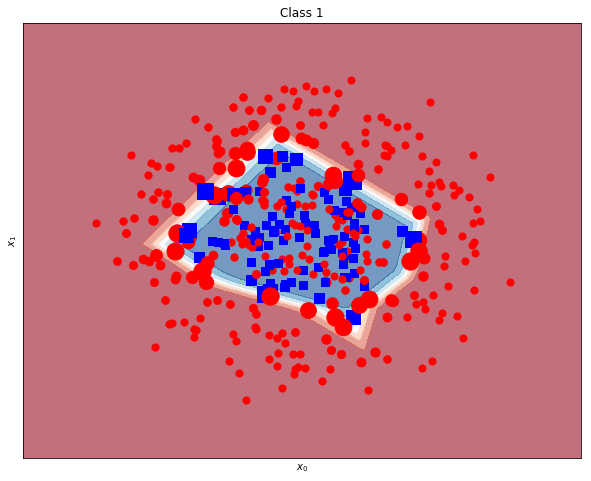

In [7]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          regularization=0,
                          training_epochs=200,
                          class_weight=[.5, 1],
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), mp, "gradient")

('Using class_weight', array([ 1.        ,  3.23157895]))
('Epoch:', '0001', 'cost=', '0.555468112')
('Epoch:', '0011', 'cost=', '0.421239808')
('Epoch:', '0021', 'cost=', '0.418509126')
('Epoch:', '0031', 'cost=', '0.418054782')
('Epoch:', '0041', 'cost=', '0.417856358')
('Epoch:', '0051', 'cost=', '0.417747475')
('Epoch:', '0061', 'cost=', '0.417682163')
('Epoch:', '0071', 'cost=', '0.417639516')
('Epoch:', '0081', 'cost=', '0.417610914')
('Epoch:', '0091', 'cost=', '0.417590141')
('Epoch:', '0101', 'cost=', '0.417574912')
('Epoch:', '0111', 'cost=', '0.417563349')
('Epoch:', '0121', 'cost=', '0.417554408')
('Epoch:', '0131', 'cost=', '0.417547144')
('Epoch:', '0141', 'cost=', '0.417541288')
('Epoch:', '0151', 'cost=', '0.417536482')
('Epoch:', '0161', 'cost=', '0.417532511')
('Epoch:', '0171', 'cost=', '0.417529300')
('Epoch:', '0181', 'cost=', '0.417526506')
('Epoch:', '0191', 'cost=', '0.417524122')
('Using class_weight', array([  1.        ,  10.44310249]))


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

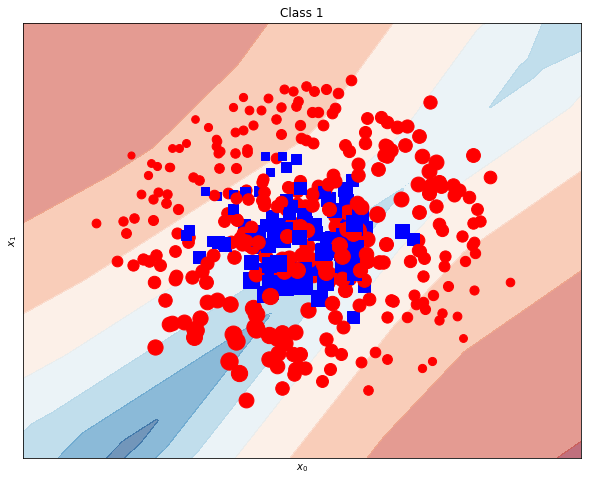

In [8]:
cdmp = ClassDepLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          regularization=0,
                          training_epochs=200,
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), cdmp, "gradient")

('Using class_weight', array([ 1.        ,  6.46315789]))
('Epoch:', '0001', 'cost=', '0.667100877')
('Epoch:', '0011', 'cost=', '0.643706195')
('Epoch:', '0021', 'cost=', '0.591685444')
('Epoch:', '0031', 'cost=', '0.532862775')
('Epoch:', '0041', 'cost=', '0.504239865')
('Epoch:', '0051', 'cost=', '0.490545064')
('Epoch:', '0061', 'cost=', '0.483803146')
('Epoch:', '0071', 'cost=', '0.479790650')
('Epoch:', '0081', 'cost=', '0.476753406')
('Epoch:', '0091', 'cost=', '0.474351555')
('Epoch:', '0101', 'cost=', '0.472553588')
('Epoch:', '0111', 'cost=', '0.471224986')
('Epoch:', '0121', 'cost=', '0.470040821')
('Epoch:', '0131', 'cost=', '0.469028860')
('Epoch:', '0141', 'cost=', '0.468365647')
('Epoch:', '0151', 'cost=', '0.467602722')
('Epoch:', '0161', 'cost=', '0.466798514')
('Epoch:', '0171', 'cost=', '0.466180265')
('Epoch:', '0181', 'cost=', '0.465653986')
('Epoch:', '0191', 'cost=', '0.465227000')
('Using class_weight', array([  1.        ,  20.88620499]))


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

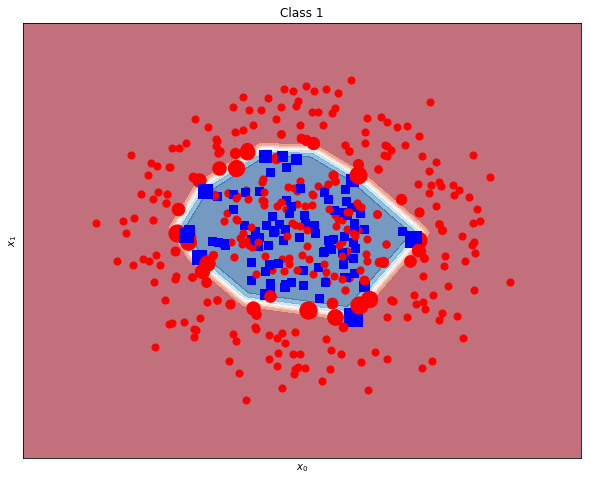

In [9]:
cdmp = ClassDepLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          regularization=0,
                          training_epochs=200,
                          class_weight=[0.5, 1],
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), cdmp, "gradient")